In [1]:
from pandas import read_csv
from os import getcwd
from iterative_sim import simulate_trajectory
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#### paths ####
cwd = getcwd()
FITTS_PARAMS_PATH = cwd + "\\..\\data\\task\\linreg_params.csv"
ALL_DATA_PATH = cwd + "\\..\\data\\all_data.csv"

###### RING PARAMETERS ######
FITTS_ID_LIST = [2.788, 3.68, 3.68, 4.623]
RING_AMPLITUDES = [0.118, 0.118, 0.236, 0.236]
TARGET_WIDTHS = [0.02, 0.01, 0.02, 0.01]
ROBOT_MTS = [0.6, 0.6, 1.2, 1.2]

In [3]:
def get_raw_data(path):
    df = read_csv(path)
    return df

fitts_params_df = get_raw_data(FITTS_PARAMS_PATH)
all_data_df = get_raw_data(ALL_DATA_PATH)

In [6]:
estimated_times = []
time_steps = 10

for (index, trial) in all_data_df.iterrows():
    
    ###### get the trial parameters ######
    part_id = trial['part_id']
    ring_id = trial['ring_id']
    alpha = trial['auto_num']

    ###### get the Fitts' linear regression parameters for the current participant
    params_row = fitts_params_df[fitts_params_df['pid']==part_id]
    a, b = params_row['intercept'].tolist()[0], params_row['slope'].tolist()[0]
    
    ###### get the movement amplitude + width ######
    A = RING_AMPLITUDES[ring_id-1]
    W = TARGET_WIDTHS[ring_id-1]
    
    ###### get the robot movement velocity ######
    robot_mt = ROBOT_MTS[ring_id-1]
    vr = A / robot_mt
    
    ###### perform the simulation to get the estimated time of completion ######
    t_vec, x_vec, v_vec, a_vec = simulate_trajectory(a, b, A, W, alpha, vr, time_steps)
    t = t_vec[-1]
    
    # print("t = %.3f" % t)
    estimated_times.append(t)

recorded_times = all_data_df['average_mt'].tolist()

Computing trajectory for T =  1.2311040329074172
D = 0.117
Computing trajectory for T =  1.2259057346067406
D = 0.111
Computing trajectory for T =  1.1964513034284412
D = 0.100
Computing trajectory for T =  1.1344256595782454
D = 0.085
Computing trajectory for T =  1.0389982611023583
D = 0.068
Computing trajectory for T =  0.9115064663586272
D = 0.050
Computing trajectory for T =  0.7540368187824186
D = 0.034
Computing trajectory for T =  0.5695496925193121
D = 0.020
Computing trajectory for T =  0.3619440550484189
D = 0.009
Final distance to target = 0.009
Computing trajectory for T =  1.3817812756070873
D = 0.117
Computing trajectory for T =  1.3750602829315468
D = 0.111
Computing trajectory for T =  1.3369691411782771
D = 0.100
Computing trajectory for T =  1.2566861482833114
D = 0.085
Computing trajectory for T =  1.1328962964756728
D = 0.068
Computing trajectory for T =  0.9667815252676935
D = 0.050
Computing trajectory for T =  0.759823545680361
D = 0.033
Computing trajectory for

Linear regression results:
intercept = -0.175, slope = 0.954
correlation = 0.842, p = 0.000, std_err = 0.036


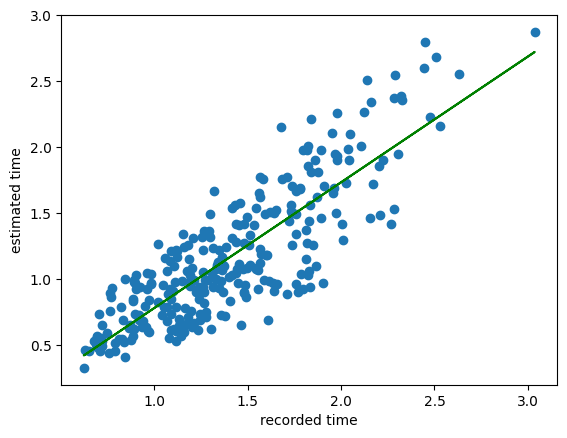

In [7]:
###### perform linear regression ######

slope, intercept, r, p, std_err = linregress(recorded_times, estimated_times)

print("Linear regression results:")
print("intercept = %.3f, slope = %.3f" % (intercept, slope))
print("correlation = %.3f, p = %.3f, std_err = %.3f" % (r, p, std_err))

def myfunc(x):
    return slope * x + intercept

model = list(map(myfunc, recorded_times))

plt.scatter(recorded_times, estimated_times)
plt.plot(recorded_times, model, "g")
plt.xlabel("recorded time")
plt.ylabel("estimated time")
plt.show()